In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2016-10-11 14:24:24,037 - kid_readout.<module>:13  kid_readout logging setup with default stream handler
INFO:kid_readout:kid_readout logging setup with default stream handler


In [3]:
import glob

In [5]:
files = glob.glob('/data/readout/2016-10-*compressor*')
print files

['/data/readout/2016-10-07_154201_20_dB_dac_compressor.nc', '/data/readout/2016-10-07_165635_10_dB_dac_compressor.nc', '/data/readout/2016-10-08_214513_20_dB_dac_compressor.nc', '/data/readout/2016-10-08_215148_10_dB_dac_compressor.nc']


In [6]:
ncf = NCFile('/data/readout/2016-10-08_215148_10_dB_dac_compressor.nc')

In [7]:
onssa = basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray1)
offssa = basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray2)

In [8]:
ondf = onssa.to_dataframe()
offdf = offssa.to_dataframe()

In [9]:
ondf.shape

(128, 66)

In [17]:
matplotlib.text.Text?

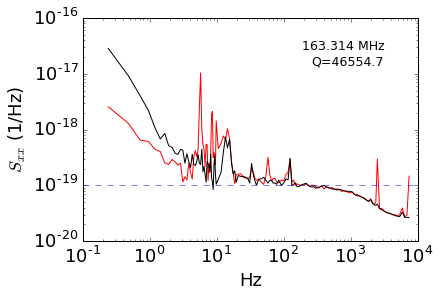

In [24]:
rcParams['font.size']=18
ax=gca()
on1 = ondf[ondf.number==103]
off1 = offdf[offdf.number==103]
for (_,on),(_,off) in zip(on1.iterrows(),off1.iterrows()):
    ax.loglog(on.S_frequency,on.S_xx,'r')
    ax.loglog(off.S_frequency,off.S_xx,'k')
ax.text(0.9,0.9,("%.3f MHz\nQ=%.1f" % (on.res_f_0/1e6,on.res_Q)),va='top',ha='right',transform=ax.transAxes,size='x-small',
       bbox=dict(color='w'))
ax.set_ylim(1e-20,1e-16)
ax.axhline(1e-19,color='b',alpha=0.5,linestyle='--')
ax.set_ylabel('$S_{xx}$ (1/Hz)')
ax.set_xlabel('Hz')

In [25]:
163e6/(2*46554)

1750.6551531554753

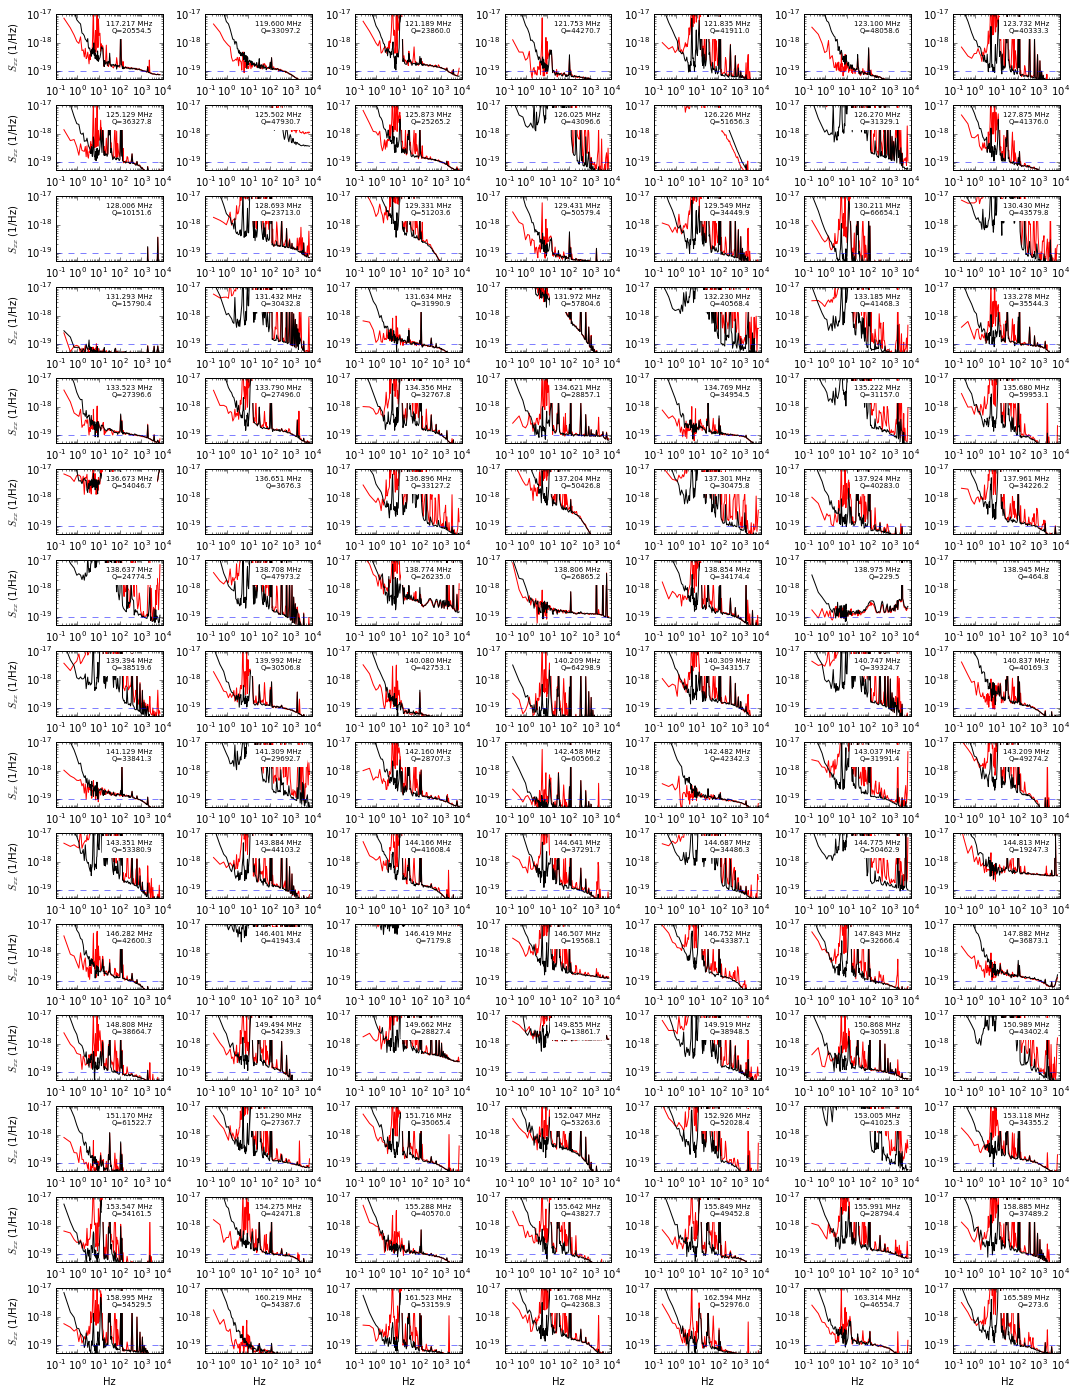

In [18]:
fig,axs = subplots(15,7,figsize=(18,24))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
for k,ax in enumerate(axs.flatten()):
    on1 = ondf[ondf.number==k]
    off1 = offdf[offdf.number==k]
    for (_,on),(_,off) in zip(on1.iterrows(),off1.iterrows()):
        ax.loglog(on.S_frequency,on.S_xx,'r')
        ax.loglog(off.S_frequency,off.S_xx,'k')
    ax.text(0.9,0.9,("%.3f MHz\nQ=%.1f" % (on.res_f_0/1e6,on.res_Q)),va='top',ha='right',transform=ax.transAxes,size='x-small',
           bbox=dict(color='w'))
    ax.set_ylim(5e-20,1e-17)
    ax.axhline(1e-19,color='b',alpha=0.5,linestyle='--')
for ax in axs[:,0]:
    ax.set_ylabel('$S_{xx}$ (1/Hz)')
for ax in axs[-1,:]:
    ax.set_xlabel('Hz')

In [36]:
det = ondf[ondf.number==1]
row = det.iloc[0]

In [38]:
ss = onssa.sweep_stream(1)

In [52]:
ss.set_q_and_x(deglitch=True)

In [62]:
ss.set_S(binned=False)

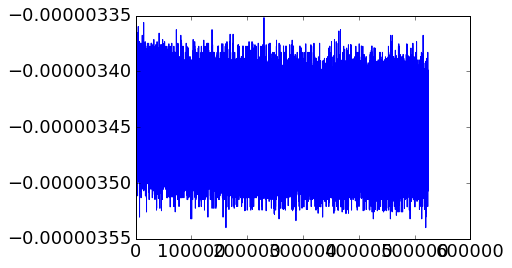

In [51]:
plot(ss.x)

In [63]:
ss.x.shape

(524288,)

In [100]:
((np.sqrt(1e-19)/5.5e-6)*1e6)/np.sqrt(2)

40.655781409087091

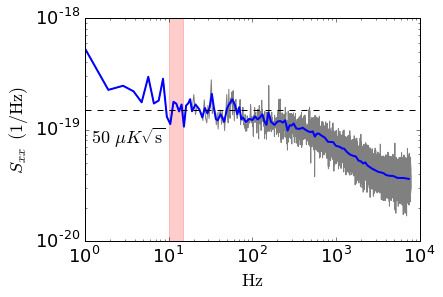

In [111]:
ss = onssa.sweep_stream(1)
ss.set_S(binned=False,NFFT=2**14)
freq = ss.S_frequency
sxx = ss.S_xx
bin_freq,bin_sxx = binning.log_bin(freq,sxx)
interp_sxx = np.interp(freq,bin_freq,bin_sxx)
mask = sxx < interp_sxx*2
freq = freq[mask]
sxx = sxx[mask]
bin_freq,bin_sxx = binning.log_bin(freq,sxx)
loglog(freq,sxx,'gray')
loglog(bin_freq,bin_sxx,lw=2,color='b')
y = 1.5e-19
uKrts = ((np.sqrt(y)/5.5e-6)*1e6)/np.sqrt(2)
axhline(y,linestyle='--',color='k')
axvspan(10,15,color='r',alpha=.2)
text(1.2,y/2,("$%.0f\,\, \mu K \sqrt{\mathrm{s}}$" % uKrts))
xlim(1,1e4)
ylim(1e-20,1e-18)
ylabel('$S_{xx}\,\,\, (1/\mathrm{Hz})$')
xlabel('$\mathrm{Hz}$')
savefig('/home/gjones/Dropbox/proposal_figures/jpl_lf_2_single_noise_spectrum.pdf',bbox_inches='tight')

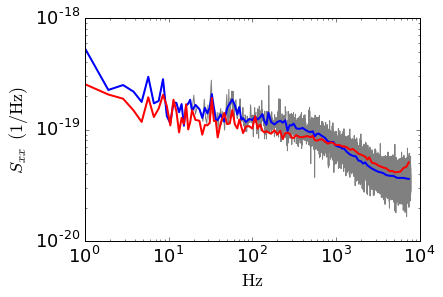

In [97]:
ss = onssa.sweep_stream(1)
ss.set_S(binned=False,NFFT=2**14)
freq = ss.S_frequency
sxx = ss.S_xx
bin_freq,bin_sxx = binning.log_bin(freq,sxx)
interp_sxx = np.interp(freq,bin_freq,bin_sxx)
mask = sxx < interp_sxx*2
freq = freq[mask]
sxx = sxx[mask]
bin_freq,bin_sxx = binning.log_bin(freq,sxx)
loglog(freq,sxx,'gray')
loglog(bin_freq,bin_sxx,lw=2,color='b')
ss = onssa.sweep_stream(60)
ss.set_S(binned=False,NFFT=2**14)
freq = ss.S_frequency
sxx = ss.S_xx
bin_freq,bin_sxx = binning.log_bin(freq,sxx)
interp_sxx = np.interp(freq,bin_freq,bin_sxx)
mask = sxx < interp_sxx*2
freq = freq[mask]
sxx = sxx[mask]
bin_freq,bin_sxx = binning.log_bin(freq,sxx)
#loglog(freq,sxx,'gray')
loglog(bin_freq,bin_sxx,lw=2,color='r')
xlim(1,1e4)
ylim(1e-20,1e-18)
ylabel('$S_{xx}\,\,\, (1/\mathrm{Hz})$')
xlabel('$\mathrm{Hz}$')
#savefig('/home/gjones/Dropbox/proposal_figures/jpl_lf_2_single_noise_spectrum.pdf',bbox_inches='tight')

In [73]:
from kid_readout.analysis.timeseries import binning

In [75]:
binning.log_bin??

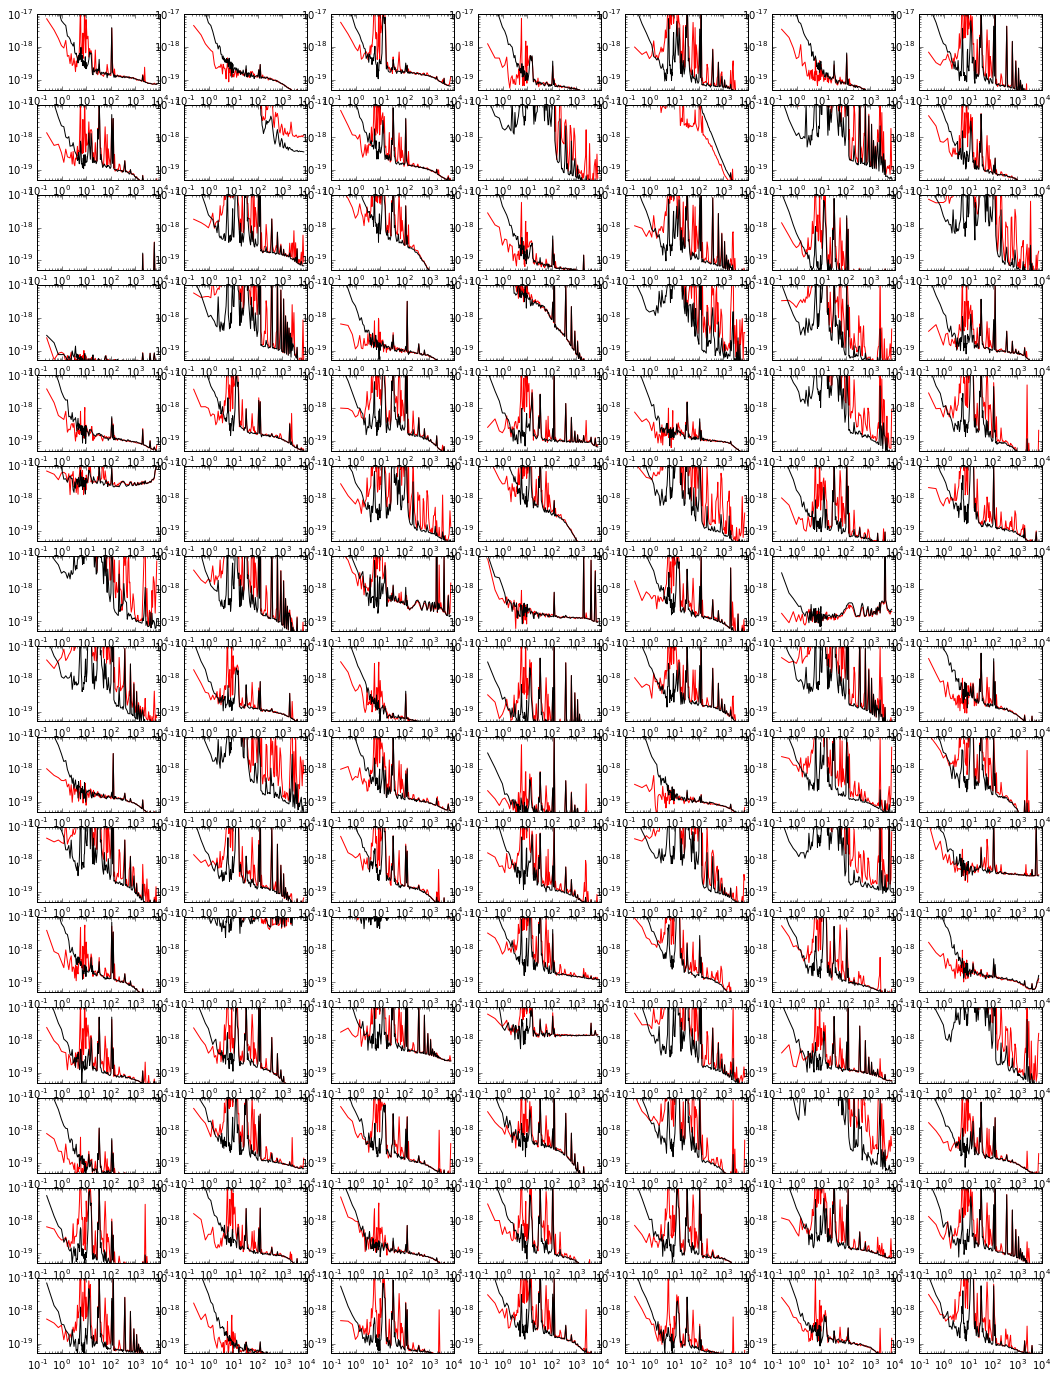

In [14]:
fig,axs = subplots(15,7,figsize=(18,24))
for k,ax in enumerate(axs.flatten()):
    on1 = ondf[ondf.number==k]
    off1 = offdf[offdf.number==k]
    for (_,on),(_,off) in zip(on1.iterrows(),off1.iterrows()):
        ax.loglog(on.S_frequency,on.S_xx,'r')
        ax.loglog(off.S_frequency,off.S_xx,'k')
    ax.set_ylim(5e-20,1e-17)

In [93]:
pola = np.load('/data/readout/archive/2016-10-20-jpl-lf-2-pola-relaxed.npy')
polb = np.load('/data/readout/archive/2016-10-20-jpl-lf-2-polb-relaxed.npy')

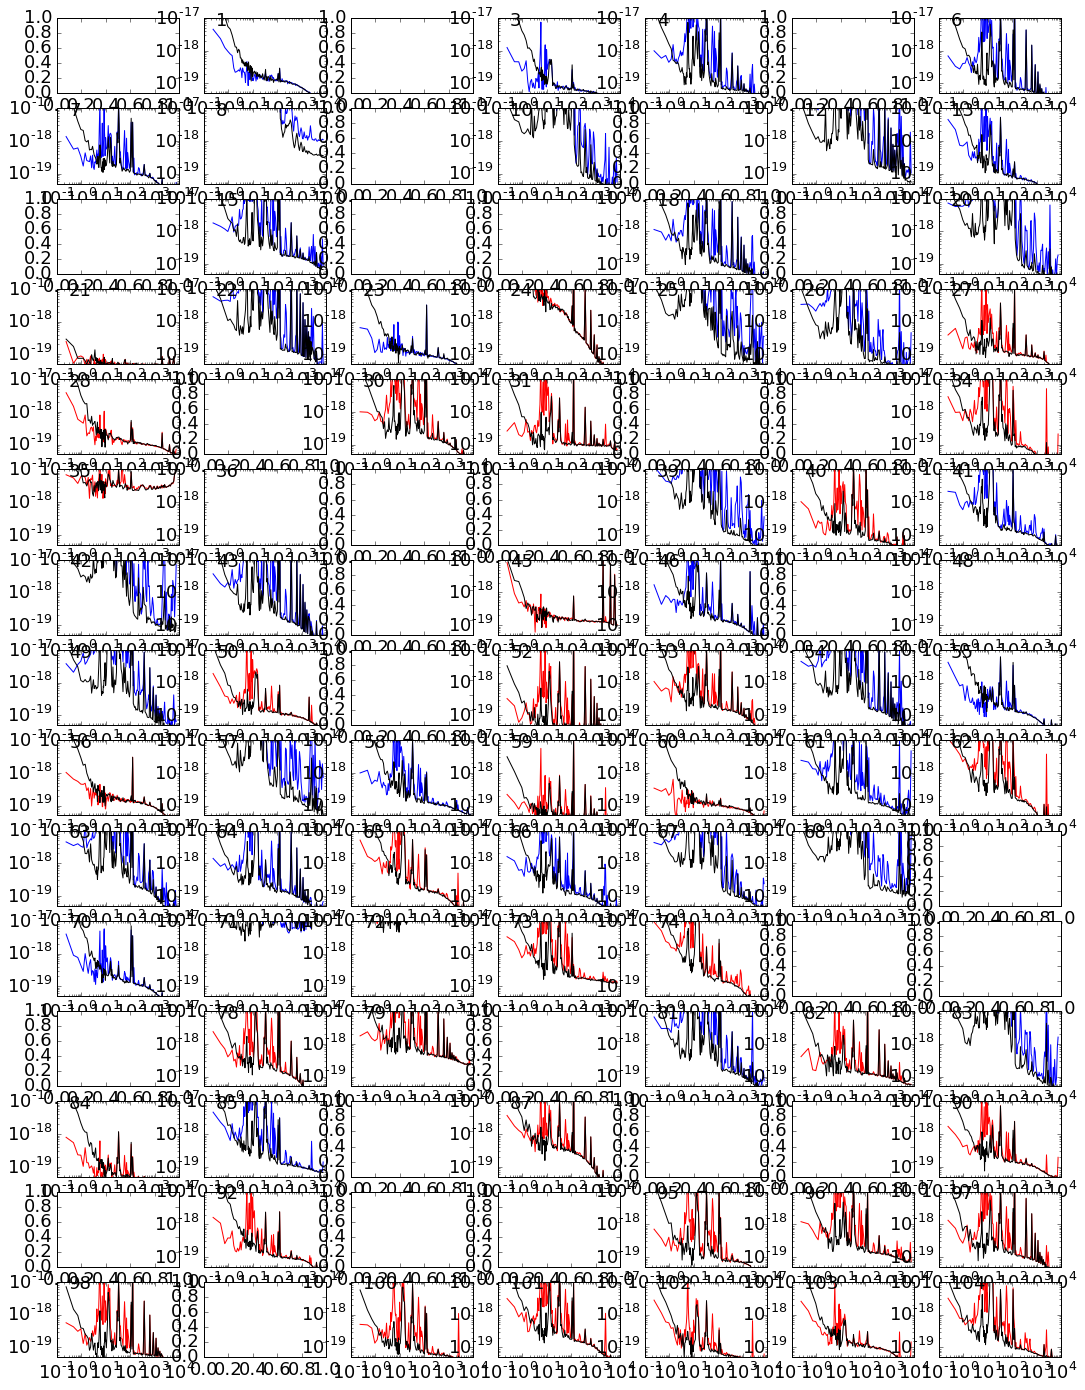

In [95]:
fig,axs = subplots(15,7,figsize=(18,24))
for k,ax in enumerate(axs.flatten()):
    if k in pola:
        color='b'
    elif k in polb:
        color='r'
    else:
        continue
    on1 = ondf[ondf.number==k]
    off1 = offdf[offdf.number==k]
    for (_,on),(_,off) in zip(on1.iterrows(),off1.iterrows()):
        ax.loglog(on.S_frequency,on.S_xx,color)
        ax.loglog(off.S_frequency,off.S_xx,'k')
    ax.set_ylim(5e-20,1e-17)
    ax.text(0.1,0.9,str(k),transform=ax.transAxes)

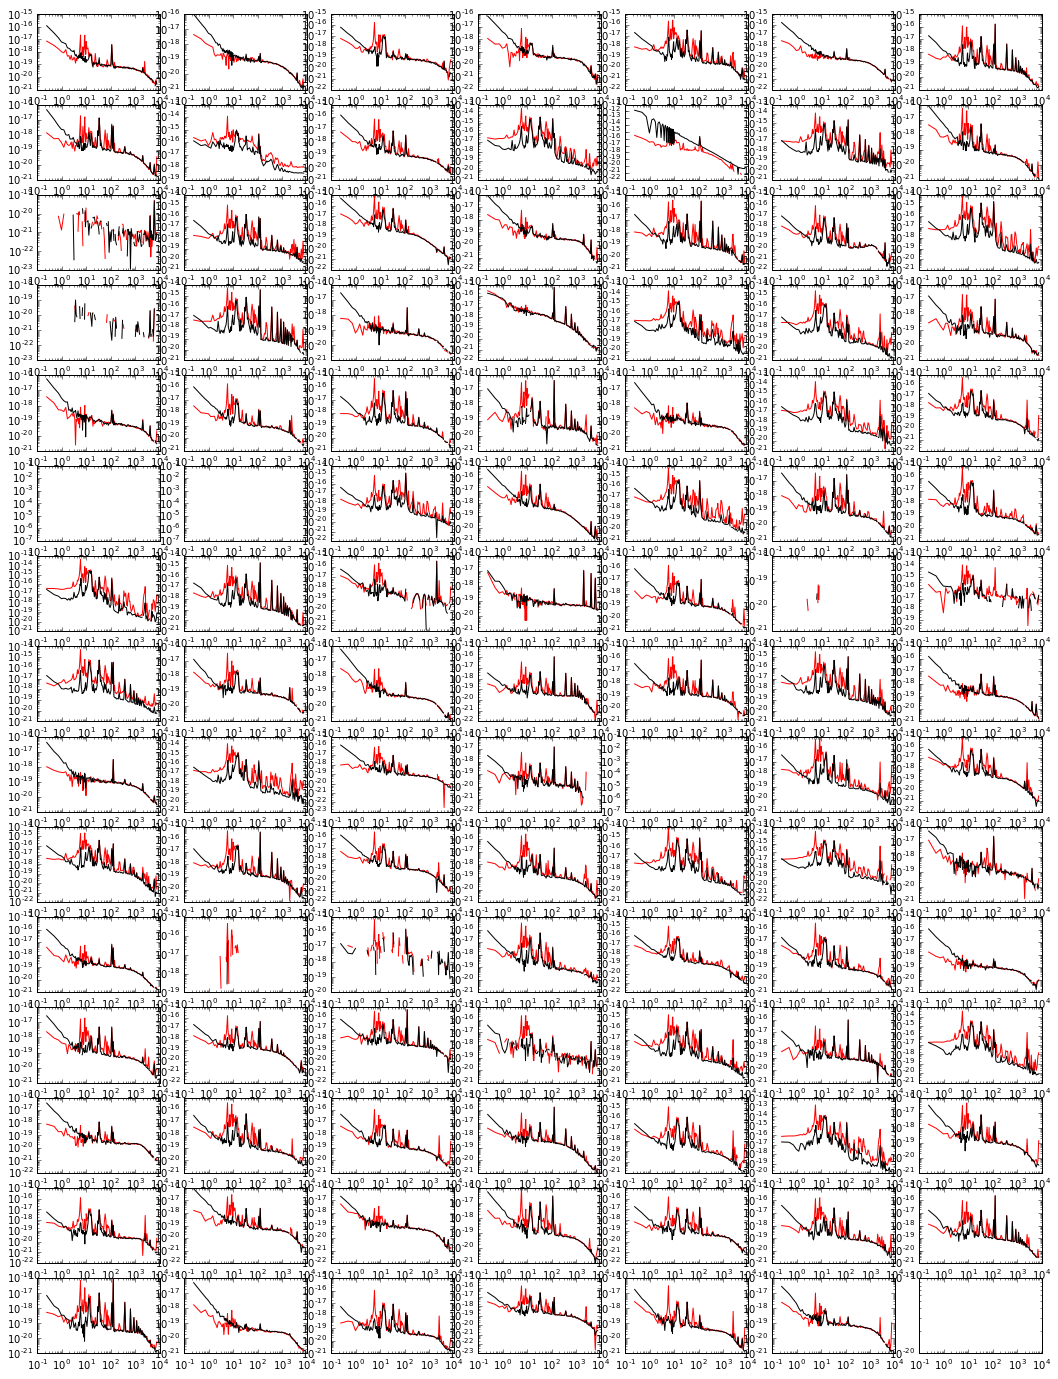

In [13]:
fig,axs = subplots(15,7,figsize=(18,24))
for k,ax in enumerate(axs.flatten()):
    on1 = ondf[ondf.number==k]
    off1 = offdf[offdf.number==k]
    for (_,on),(_,off) in zip(on1.iterrows(),off1.iterrows()):
        try:
            ax.loglog(on.S_frequency,on.S_xx-on.S_yy,'r')
            ax.loglog(off.S_frequency,off.S_xx-off.S_yy,'k')
        except ValueError:
            pass